In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/moistureminds22/user1_data.csv
/kaggle/input/moistureminds22/user2_data.csv


In [30]:
df = pd.read_csv('/kaggle/input/moistureminds22/user1_data.csv',index_col=0 ,parse_dates=True)
df2 = pd.read_csv('/kaggle/input/moistureminds22/user2_data.csv',index_col=0 ,parse_dates=True)

In [31]:
df2.head()

,pm1,pm2,pm3,am,sm,lum,temp,humd,pres
ttime,,,,,,,,,
2022-07-18 15:39:58,0.83,0.00,0.00,0.0,7463.0,6547.0,23.02,90.57,92849.25
2022-07-18 15:44:55,1.39,0.00,0.00,0.0,7576.0,10249.0,23.47,88.37,92848.31
2022-07-18 15:49:55,1.95,0.00,0.00,0.0,7576.0,12636.0,23.64,85.26,92844.82
2022-07-18 15:54:55,2.51,0.00,0.00,0.0,7463.0,8318.0,23.62,85.93,92834.94
2022-07-18 15:59:56,0.55,2.51,2.51,0.0,7463.0,4149.0,23.82,86.06,92815.25


### understanding the seasonality of the target variable by visualising it against time column

Text(0.5, 1.0, 'Residual Component of soil moisture')

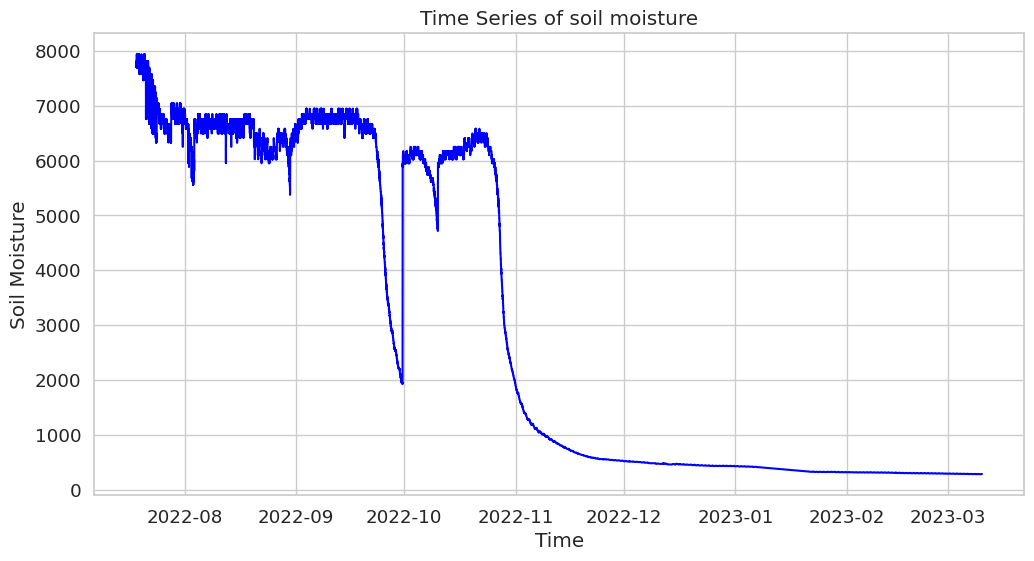

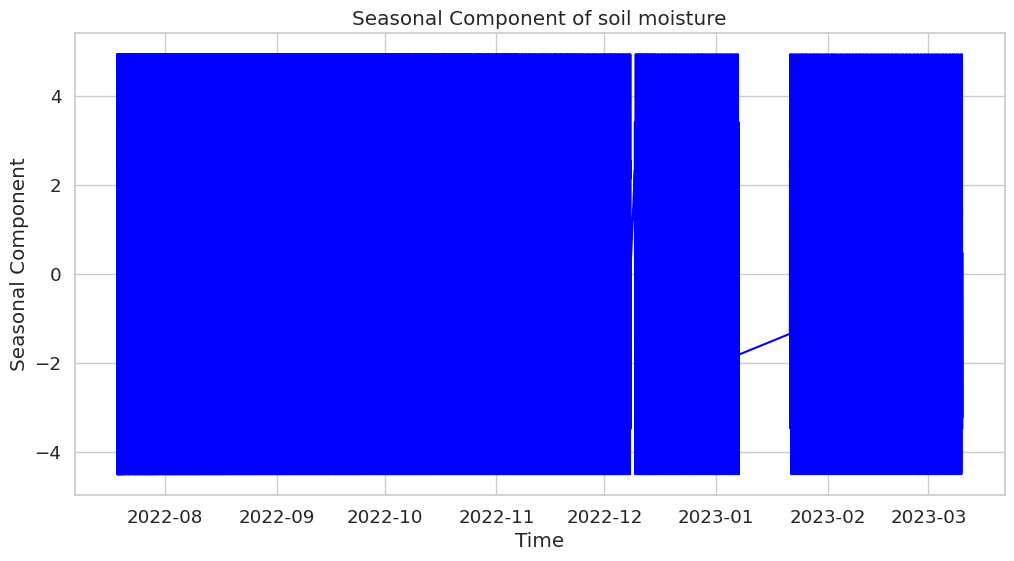

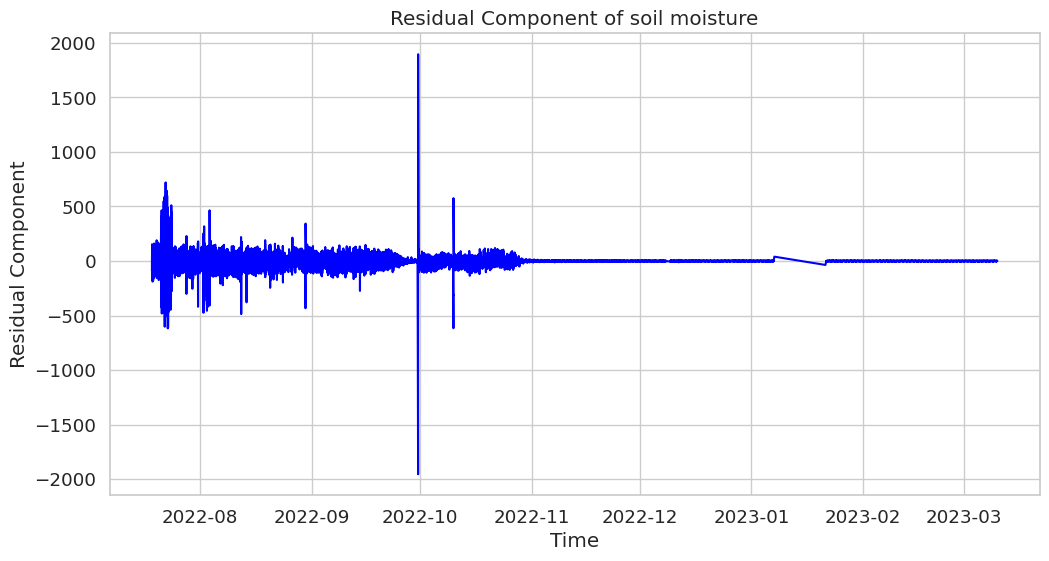

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

data=df


# Convert the time column to a datetime object
# data['ttime'] = pd.to_datetime(data['ttime'])

# Set the time column as the DataFrame index
# data = data.set_index('ttime')

# Plot the time series
plt.figure(figsize=(12,6))
plt.plot(data.index, data['sm'], color='blue')
plt.xlabel('Time')
plt.ylabel('Soil Moisture')
plt.title('Time Series of soil moisture')

# Decompose the time series into its seasonal and residual components
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['sm'], model='additive', period=24)

# Plot the seasonal component
plt.figure(figsize=(12,6))
plt.plot(decomposition.seasonal.index, decomposition.seasonal.values, color='blue')
plt.xlabel('Time')
plt.ylabel('Seasonal Component')
plt.title('Seasonal Component of soil moisture')

# Plot the residual component
plt.figure(figsize=(12,6))
plt.plot(decomposition.resid.index, decomposition.resid.values, color='blue')
plt.xlabel('Time')
plt.ylabel('Residual Component')
plt.title('Residual Component of soil moisture')


### Inference:
####        For the first dataset we can see that the soil moisture is gradually decreases overtime until late october. But there is sudden decrease from 6000 to 1000 in november.
####        There is no seasonality found in the mid january.

Text(0.5, 1.0, 'Residual Component of soil moisture')

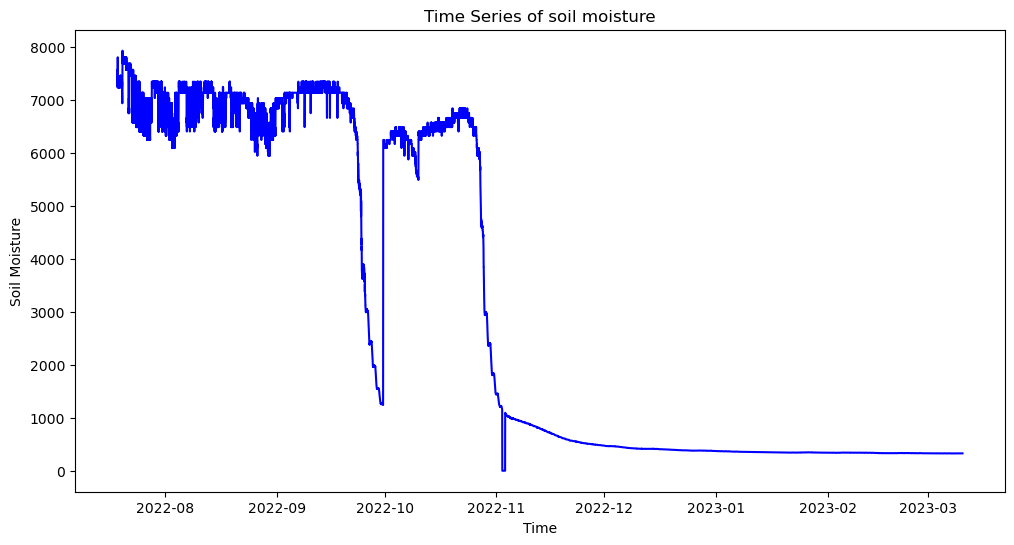

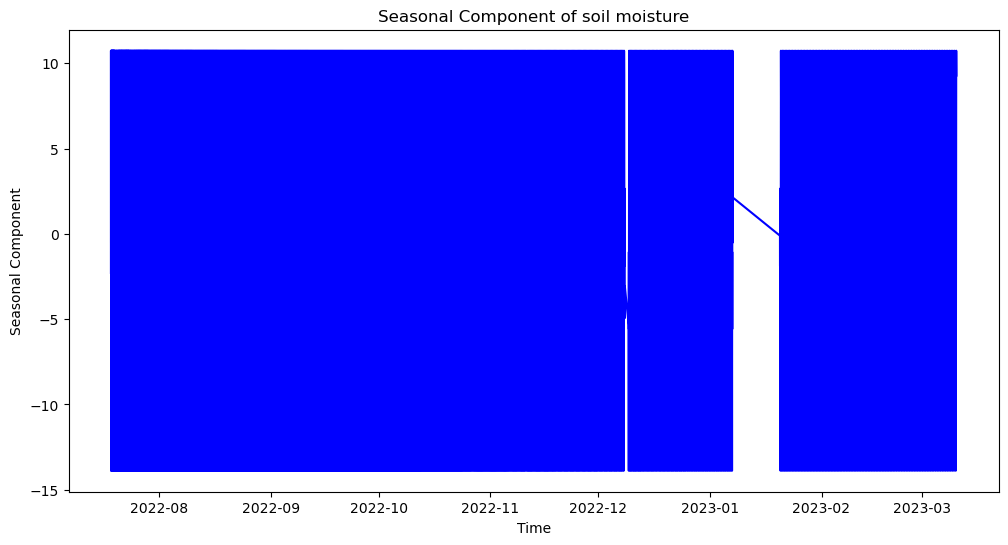

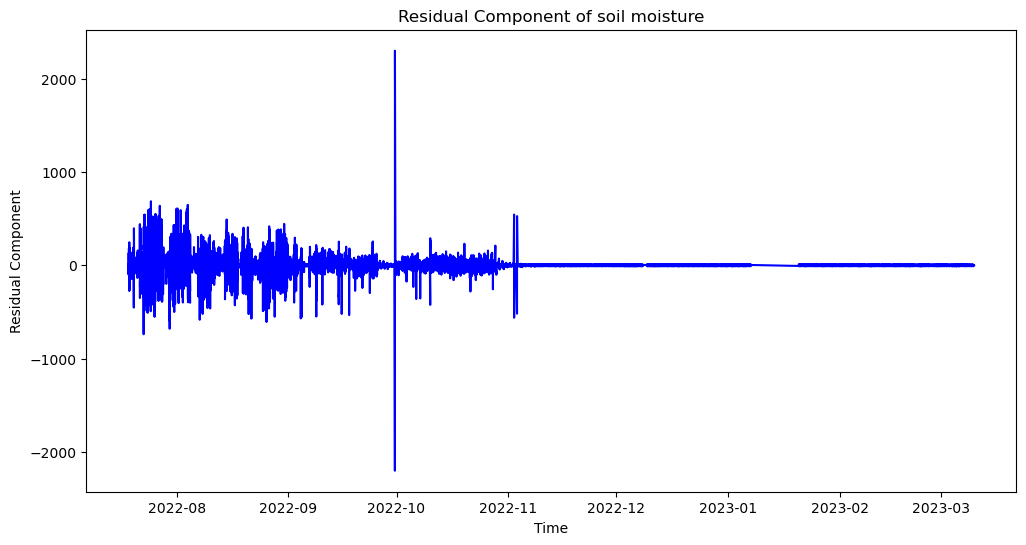

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

data=df2


# Convert the time column to a datetime object
# data['ttime'] = pd.to_datetime(data['ttime'])

# Set the time column as the DataFrame index
# data = data.set_index('ttime')

# Plot the time series
plt.figure(figsize=(12,6))
plt.plot(data.index, data['sm'], color='blue')
plt.xlabel('Time')
plt.ylabel('Soil Moisture')
plt.title('Time Series of soil moisture')

# Decompose the time series into its seasonal and residual components
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['sm'], model='additive', period=24)

# Plot the seasonal component
plt.figure(figsize=(12,6))
plt.plot(decomposition.seasonal.index, decomposition.seasonal.values, color='blue')
plt.xlabel('Time')
plt.ylabel('Seasonal Component')
plt.title('Seasonal Component of soil moisture')

# Plot the residual component
plt.figure(figsize=(12,6))
plt.plot(decomposition.resid.index, decomposition.resid.values, color='blue')
plt.xlabel('Time')
plt.ylabel('Residual Component')
plt.title('Residual Component of soil moisture')


### Inference:
####      In the second dataset, 

In [21]:
data.dtypes

pm1    float64
pm2    float64
pm3    float64
am     float64
sm     float64
st     float64
lum    float64
dtype: object

### stationarity of the columns with respect to time
##### The data needs to be stationary, i.e., the variables like mean, median should remain constant over time for forecasting any time series data

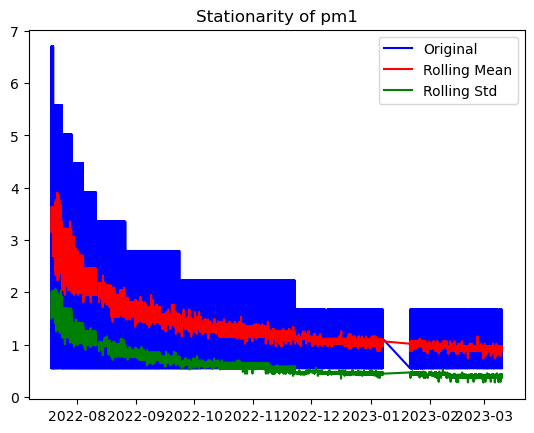

Results of Augmented Dickey-Fuller Test for pm1:
Test Statistic                    -3.050569
p-value                            0.030434
Lags Used                         44.000000
Number of Observations Used    19296.000000
Critical Value (1%)               -3.430689
Critical Value (5%)               -2.861690
Critical Value (10%)              -2.566850
dtype: float64


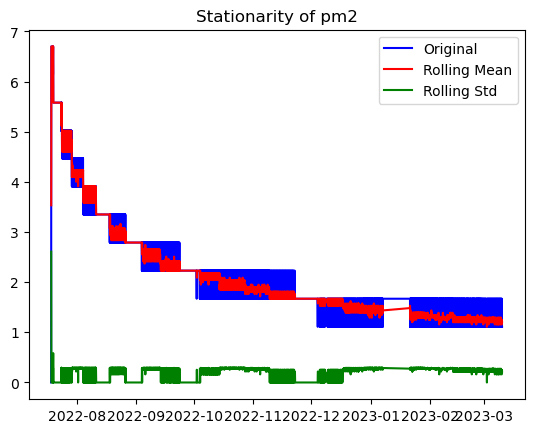

Results of Augmented Dickey-Fuller Test for pm2:
Test Statistic                    -4.209102
p-value                            0.000636
Lags Used                         45.000000
Number of Observations Used    19295.000000
Critical Value (1%)               -3.430689
Critical Value (5%)               -2.861690
Critical Value (10%)              -2.566850
dtype: float64


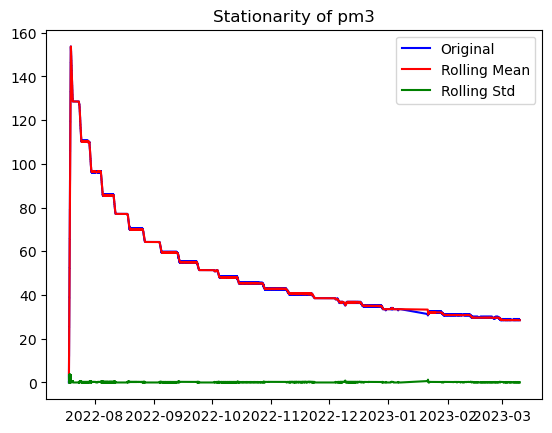

Results of Augmented Dickey-Fuller Test for pm3:
Test Statistic                    -2.992776
p-value                            0.035575
Lags Used                         44.000000
Number of Observations Used    19296.000000
Critical Value (1%)               -3.430689
Critical Value (5%)               -2.861690
Critical Value (10%)              -2.566850
dtype: float64


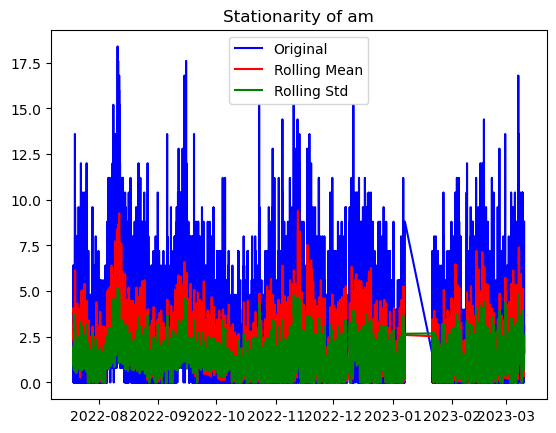

Results of Augmented Dickey-Fuller Test for am:
Test Statistic                -1.214642e+01
p-value                        1.606916e-22
Lags Used                      4.500000e+01
Number of Observations Used    1.929500e+04
Critical Value (1%)           -3.430689e+00
Critical Value (5%)           -2.861690e+00
Critical Value (10%)          -2.566850e+00
dtype: float64


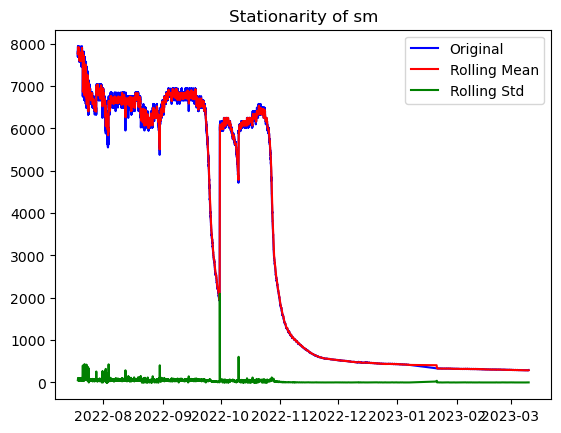

Results of Augmented Dickey-Fuller Test for sm:
Test Statistic                    -0.825781
p-value                            0.811431
Lags Used                         45.000000
Number of Observations Used    19295.000000
Critical Value (1%)               -3.430689
Critical Value (5%)               -2.861690
Critical Value (10%)              -2.566850
dtype: float64


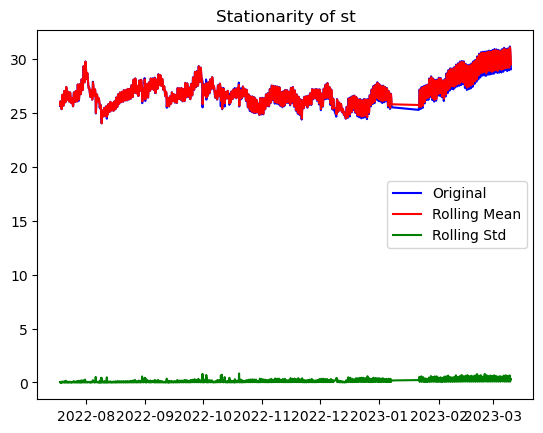

Results of Augmented Dickey-Fuller Test for st:
Test Statistic                    -4.409054
p-value                            0.000286
Lags Used                         45.000000
Number of Observations Used    19295.000000
Critical Value (1%)               -3.430689
Critical Value (5%)               -2.861690
Critical Value (10%)              -2.566850
dtype: float64


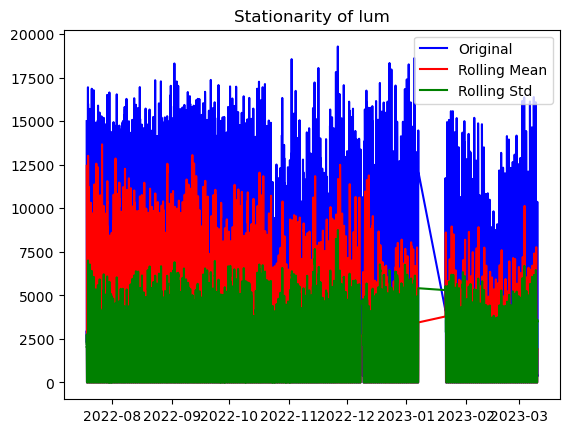

Results of Augmented Dickey-Fuller Test for lum:
Test Statistic                   -24.573605
p-value                            0.000000
Lags Used                         35.000000
Number of Observations Used    19305.000000
Critical Value (1%)               -3.430689
Critical Value (5%)               -2.861690
Critical Value (10%)              -2.566850
dtype: float64


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller



# Loop through all columns and plot their stationarity
for col in data.columns:
    # Calculate the rolling mean and standard deviation
#     col=col.astype(float)
    rolling_mean = data[col].rolling(window=12).mean()
    rolling_std = data[col].rolling(window=12).std()

    # Plot the time series data, rolling mean, and rolling standard deviation
    plt.plot(data[col], color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='green', label='Rolling Std')
    plt.legend(loc='best')
    plt.title(f'Stationarity of {col}')
    plt.show()

    # Perform the Augmented Dickey-Fuller test to check stationarity
    print(f'Results of Augmented Dickey-Fuller Test for {col}:')
    adf_test = adfuller(data[col])
    adf_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    for key, value in adf_test[4].items():
        adf_output[f'Critical Value ({key})'] = value
    print(adf_output)


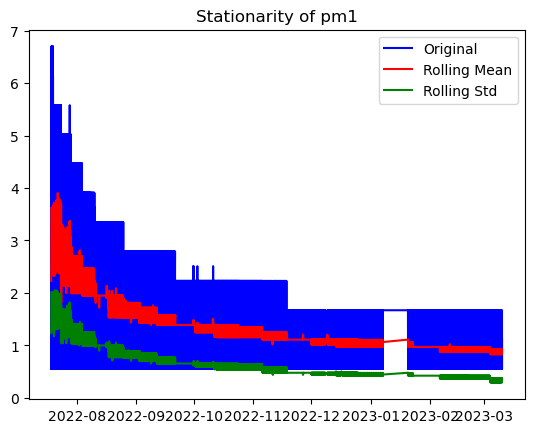

Results of Augmented Dickey-Fuller Test for pm1:
Test Statistic                    -3.349367
p-value                            0.012811
Lags Used                         45.000000
Number of Observations Used    20120.000000
Critical Value (1%)               -3.430675
Critical Value (5%)               -2.861684
Critical Value (10%)              -2.566846
dtype: float64


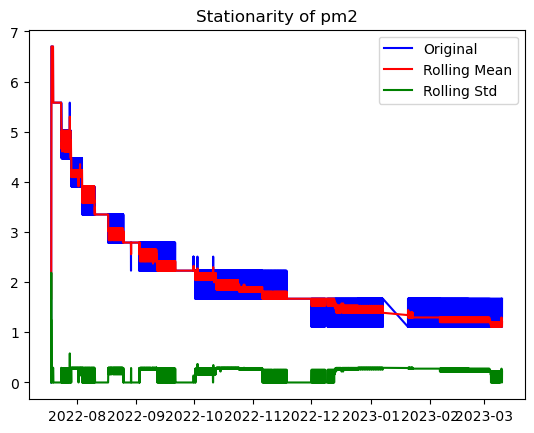

Results of Augmented Dickey-Fuller Test for pm2:
Test Statistic                    -3.904351
p-value                            0.002003
Lags Used                         45.000000
Number of Observations Used    20120.000000
Critical Value (1%)               -3.430675
Critical Value (5%)               -2.861684
Critical Value (10%)              -2.566846
dtype: float64


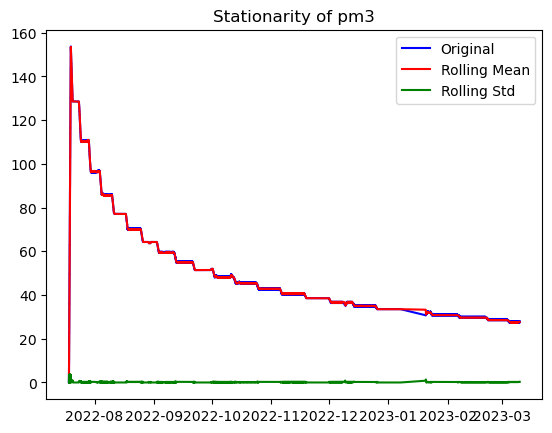

Results of Augmented Dickey-Fuller Test for pm3:
Test Statistic                    -2.600757
p-value                            0.092841
Lags Used                         46.000000
Number of Observations Used    20119.000000
Critical Value (1%)               -3.430675
Critical Value (5%)               -2.861684
Critical Value (10%)              -2.566846
dtype: float64


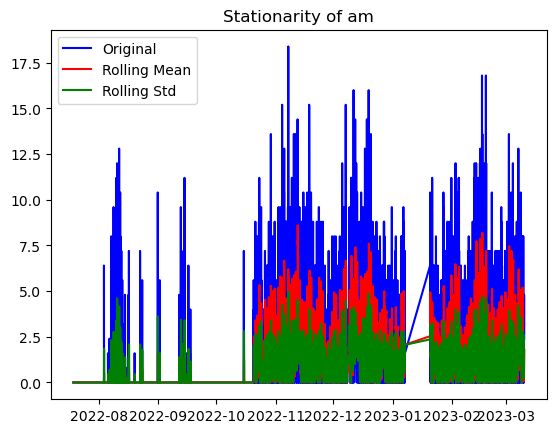

Results of Augmented Dickey-Fuller Test for am:
Test Statistic                -1.132438e+01
p-value                        1.153120e-20
Lags Used                      4.600000e+01
Number of Observations Used    2.011900e+04
Critical Value (1%)           -3.430675e+00
Critical Value (5%)           -2.861684e+00
Critical Value (10%)          -2.566846e+00
dtype: float64


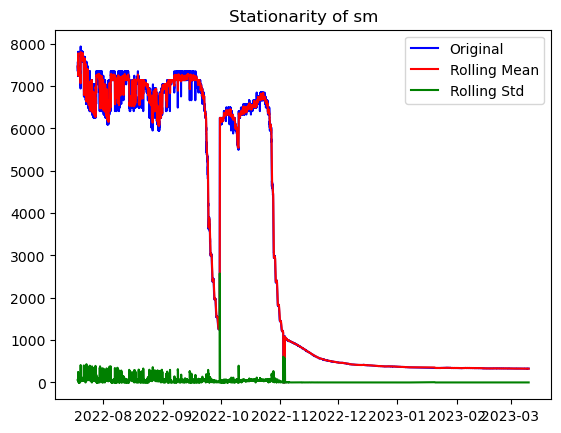

Results of Augmented Dickey-Fuller Test for sm:
Test Statistic                    -0.960206
p-value                            0.767500
Lags Used                         28.000000
Number of Observations Used    20137.000000
Critical Value (1%)               -3.430675
Critical Value (5%)               -2.861684
Critical Value (10%)              -2.566846
dtype: float64


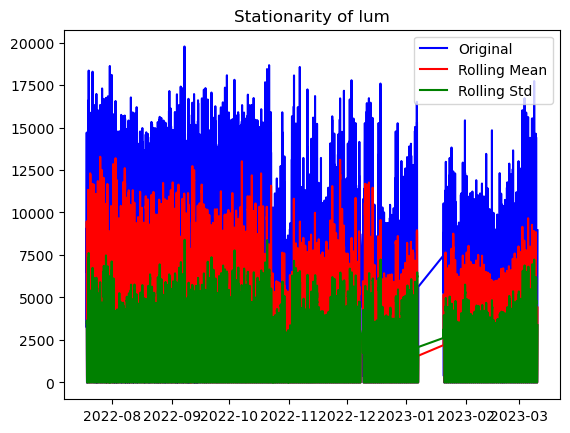

Results of Augmented Dickey-Fuller Test for lum:
Test Statistic                   -24.736903
p-value                            0.000000
Lags Used                         44.000000
Number of Observations Used    20121.000000
Critical Value (1%)               -3.430675
Critical Value (5%)               -2.861684
Critical Value (10%)              -2.566846
dtype: float64


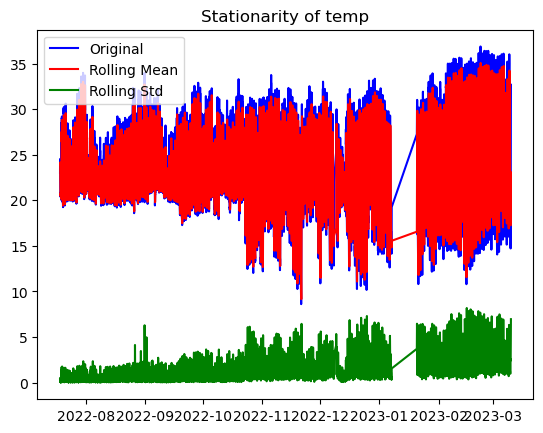

Results of Augmented Dickey-Fuller Test for temp:
Test Statistic                -1.624276e+01
p-value                        3.713033e-29
Lags Used                      4.600000e+01
Number of Observations Used    2.011900e+04
Critical Value (1%)           -3.430675e+00
Critical Value (5%)           -2.861684e+00
Critical Value (10%)          -2.566846e+00
dtype: float64


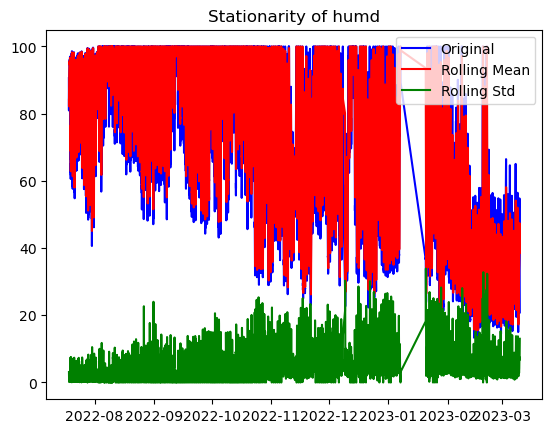

Results of Augmented Dickey-Fuller Test for humd:
Test Statistic                -8.022162e+00
p-value                        2.062449e-12
Lags Used                      4.600000e+01
Number of Observations Used    2.011900e+04
Critical Value (1%)           -3.430675e+00
Critical Value (5%)           -2.861684e+00
Critical Value (10%)          -2.566846e+00
dtype: float64


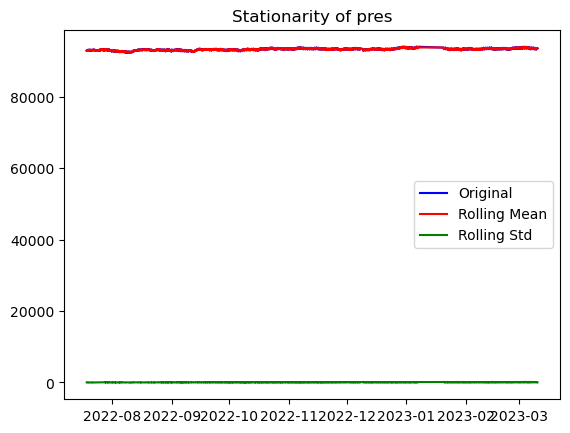

Results of Augmented Dickey-Fuller Test for pres:
Test Statistic                    -3.976177
p-value                            0.001541
Lags Used                         39.000000
Number of Observations Used    20126.000000
Critical Value (1%)               -3.430675
Critical Value (5%)               -2.861684
Critical Value (10%)              -2.566846
dtype: float64


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller



# Loop through all columns and plot their stationarity
for col in data.columns:
    # Calculate the rolling mean and standard deviation
#     col=col.astype(float)
    rolling_mean = data[col].rolling(window=12).mean()
    rolling_std = data[col].rolling(window=12).std()

    # Plot the time series data, rolling mean, and rolling standard deviation
    plt.plot(data[col], color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='green', label='Rolling Std')
    plt.legend(loc='best')
    plt.title(f'Stationarity of {col}')
    plt.show()

    # Perform the Augmented Dickey-Fuller test to check stationarity
    print(f'Results of Augmented Dickey-Fuller Test for {col}:')
    adf_test = adfuller(data[col])
    adf_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    for key, value in adf_test[4].items():
        adf_output[f'Critical Value ({key})'] = value
    print(adf_output)


### visualising trend with respect to time 
#### Its important to remove any trend(moving of data in one direction) for accurate forecasting

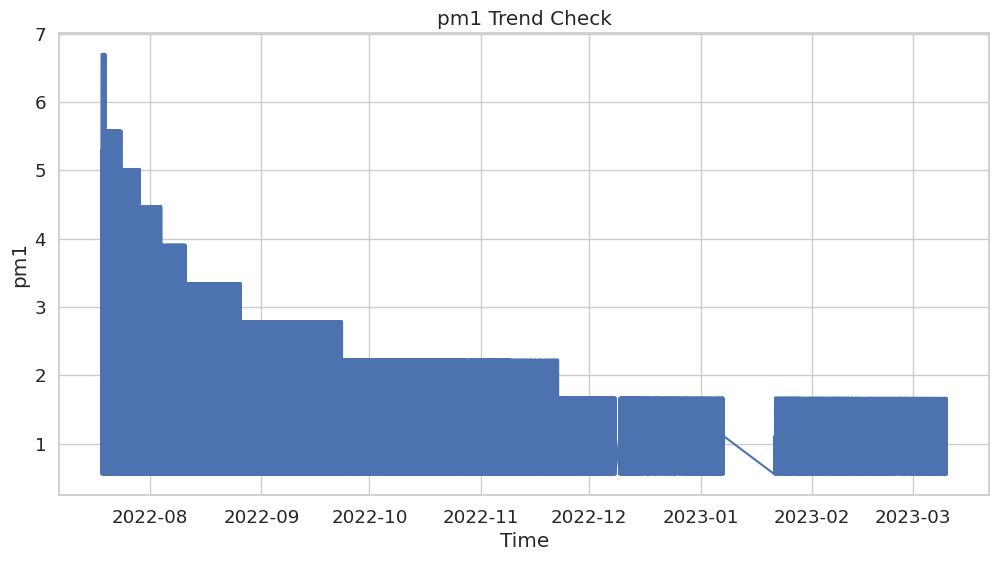

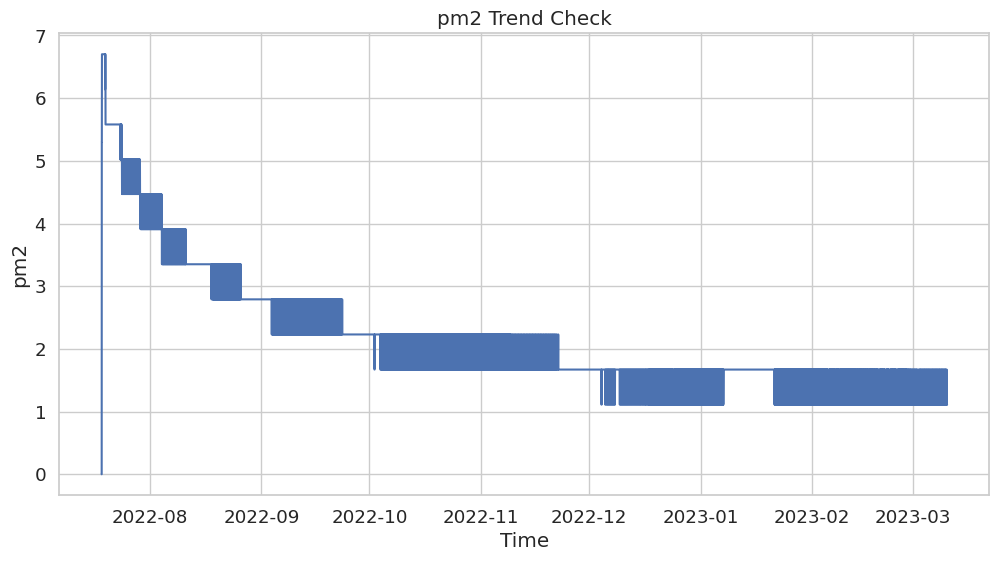

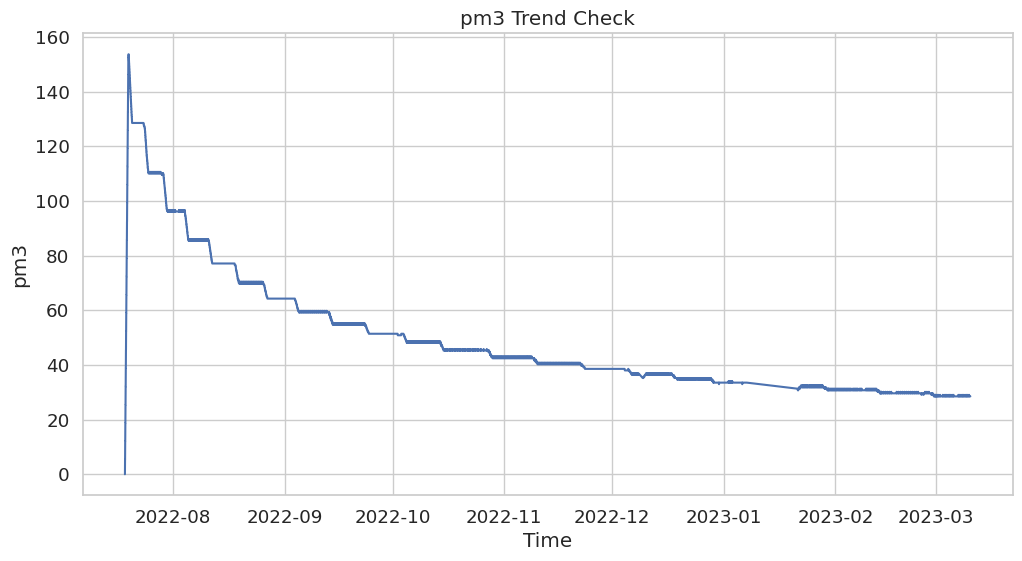

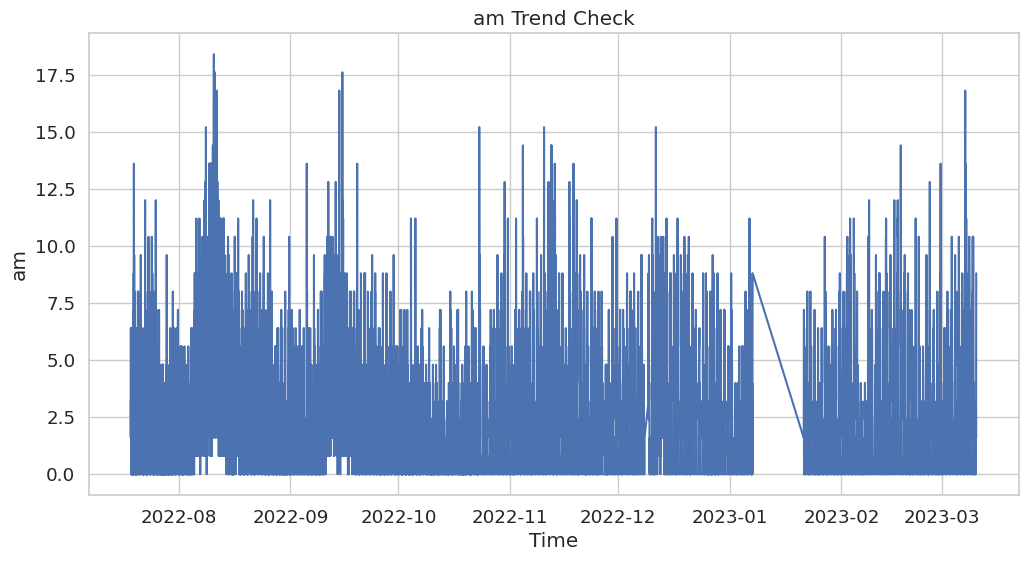

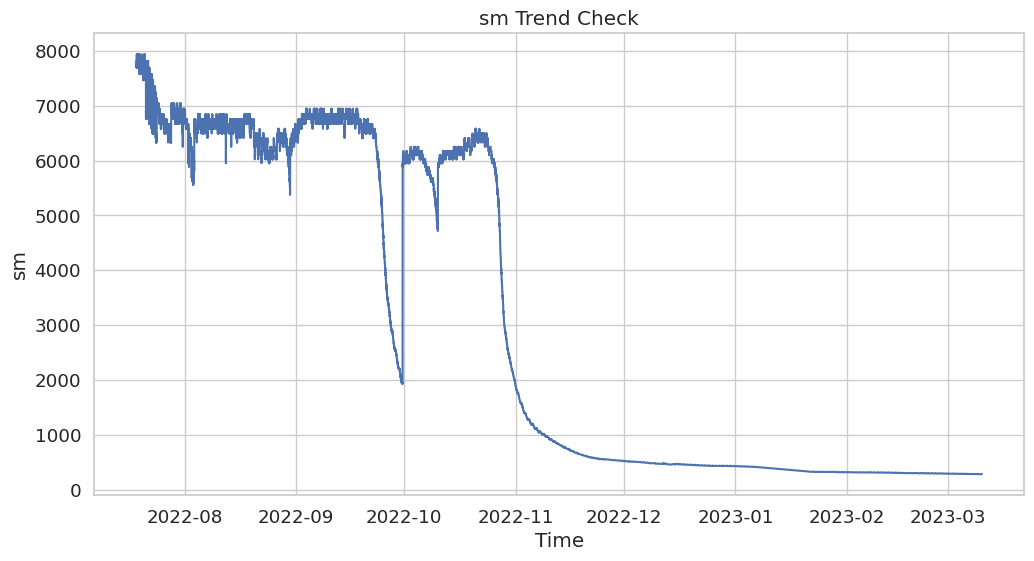

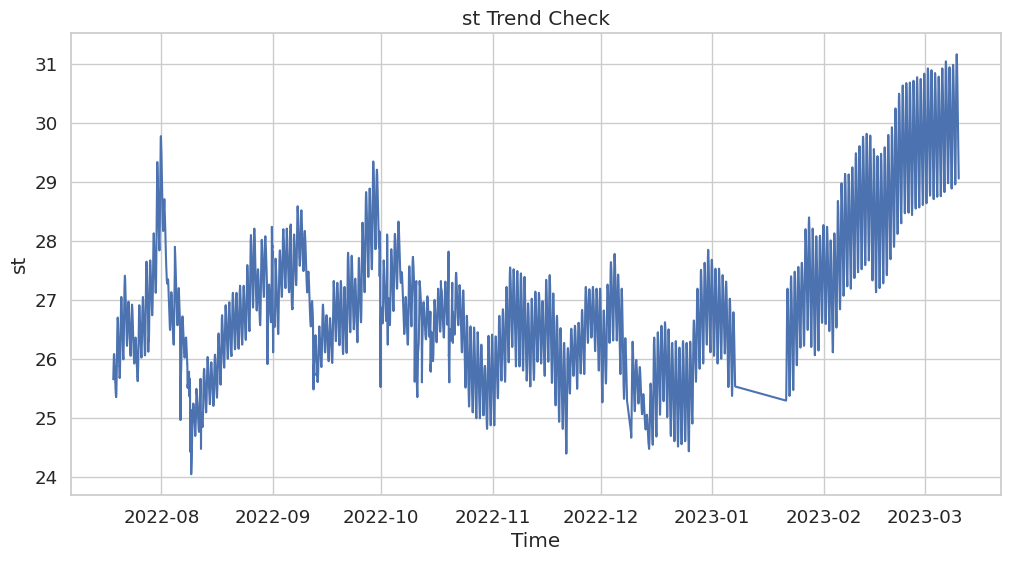

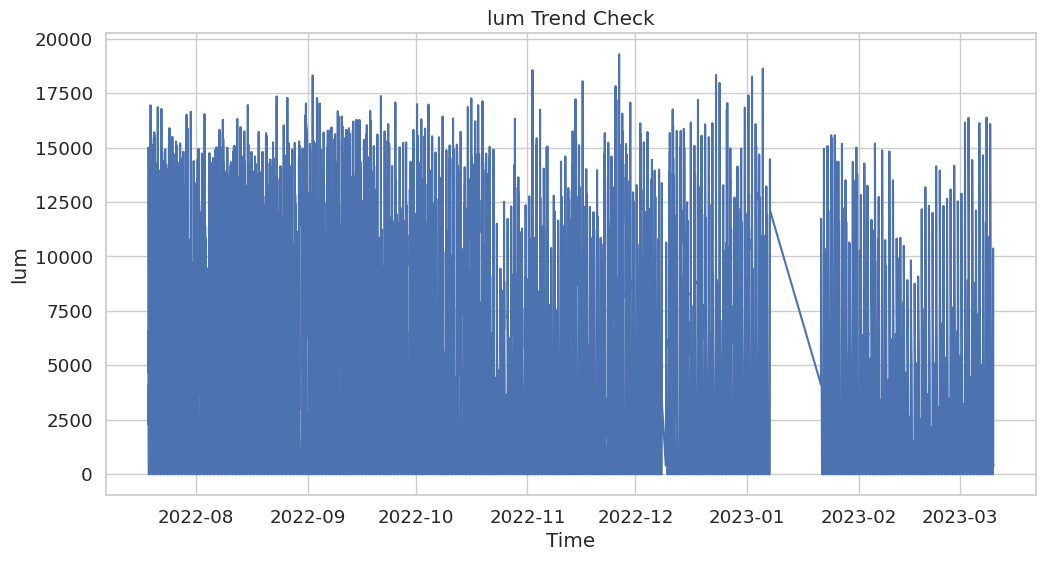

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the time series dataset into a pandas DataFrame
# df = pd.read_csv('your_dataset.csv', index_col='time_column', parse_dates=['time_column'])

# Plot the trend of each column with respect to time
sns.set(style='whitegrid', font_scale=1.2)
for column in data.columns:
    plt.figure(figsize=(12,6))
    plt.title(f'{column} Trend Check')
    sns.lineplot(data=data, x=data.index, y=column)
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.show()


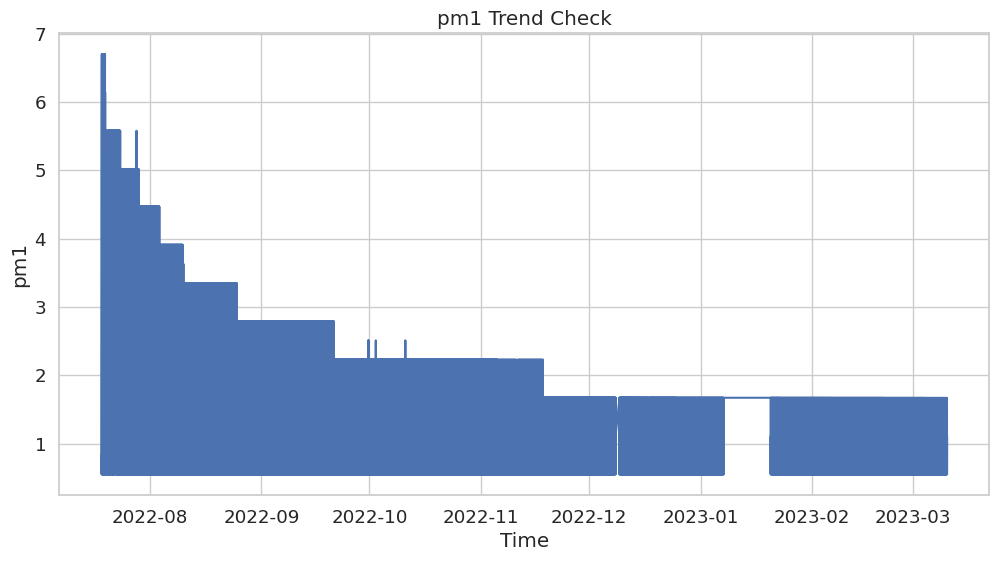

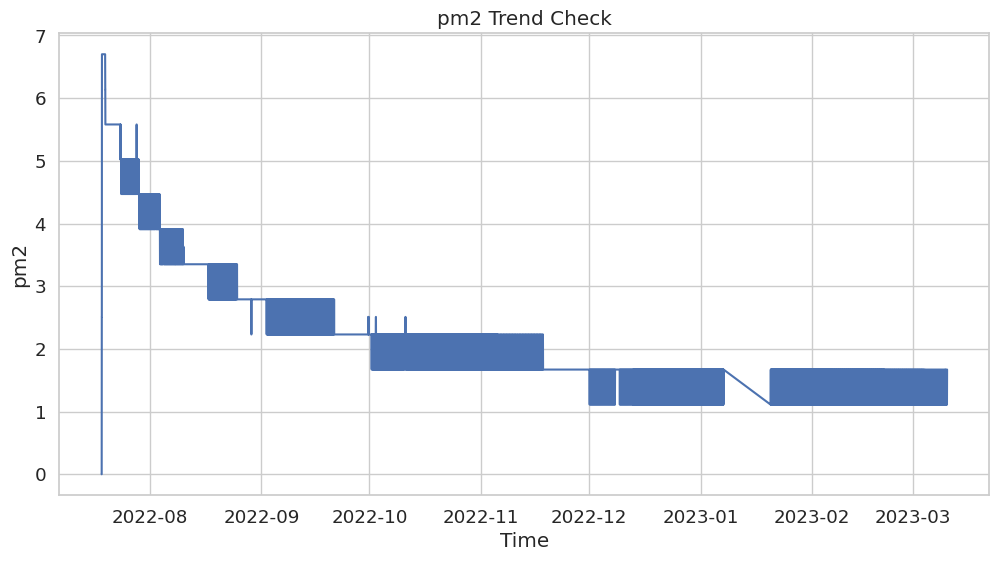

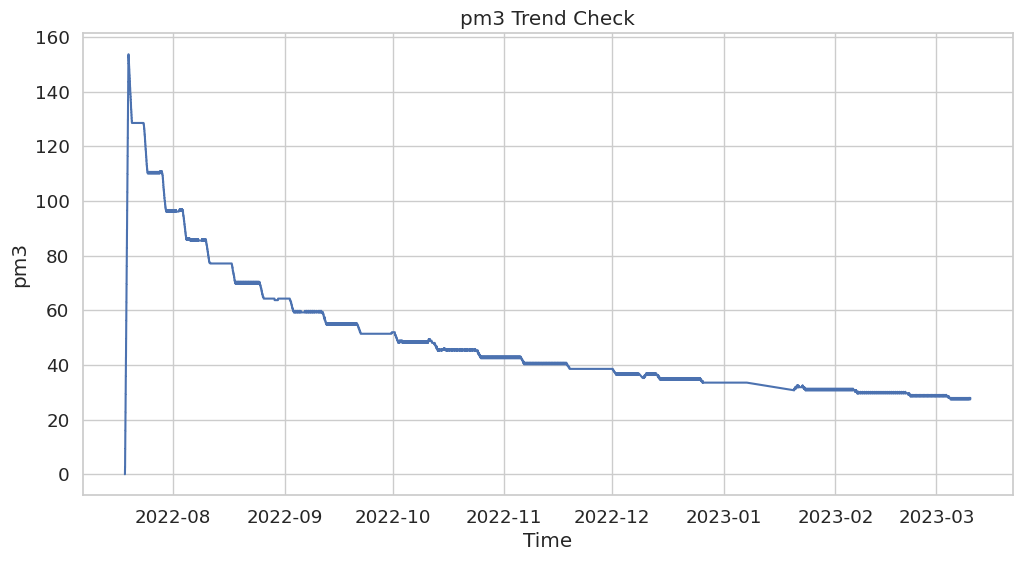

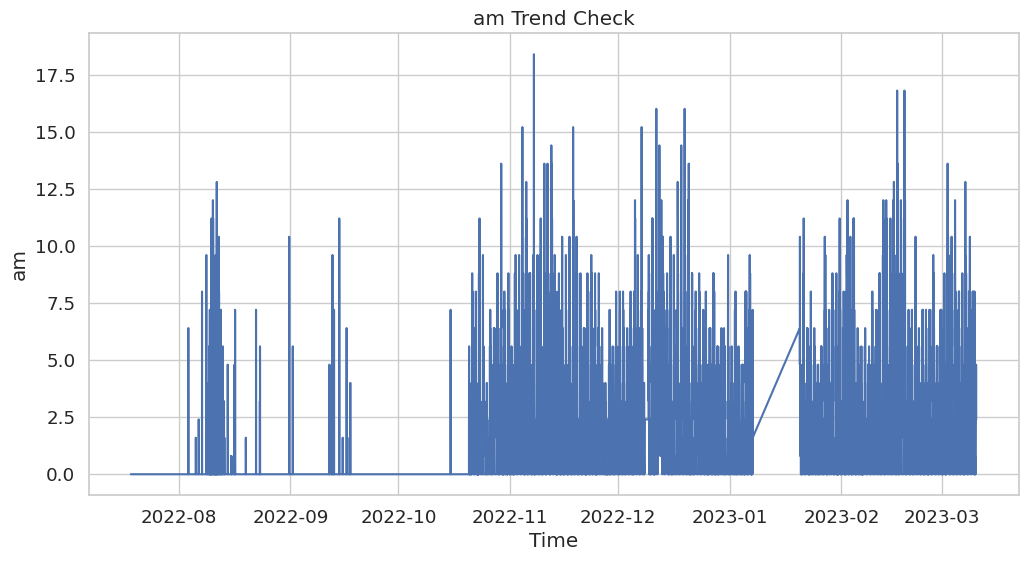

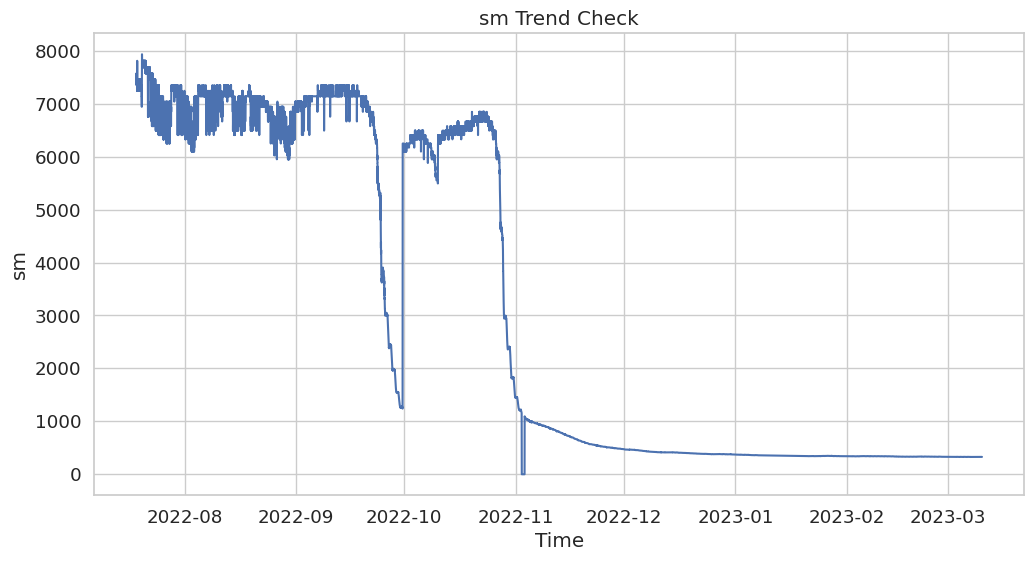

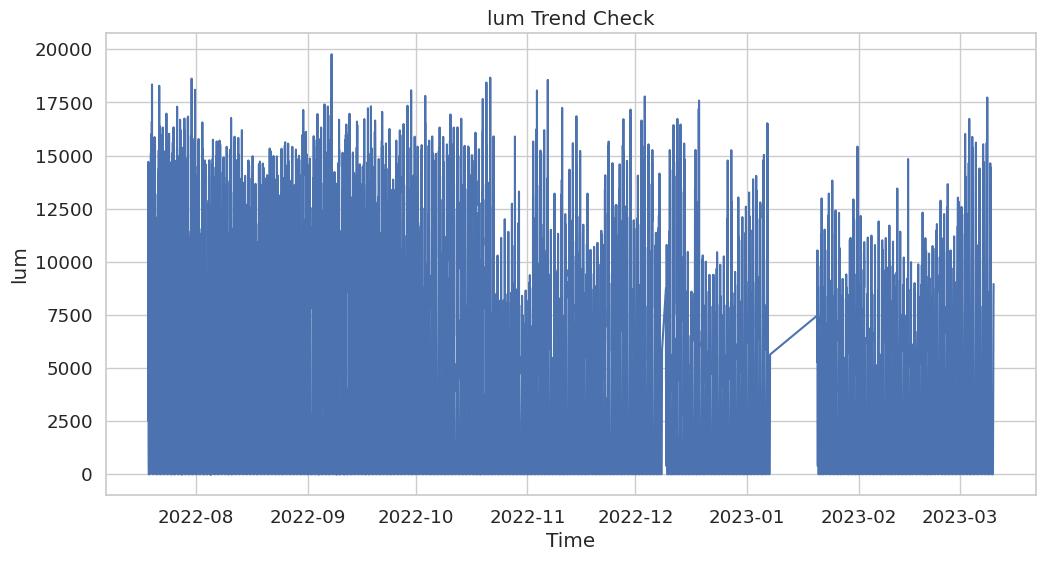

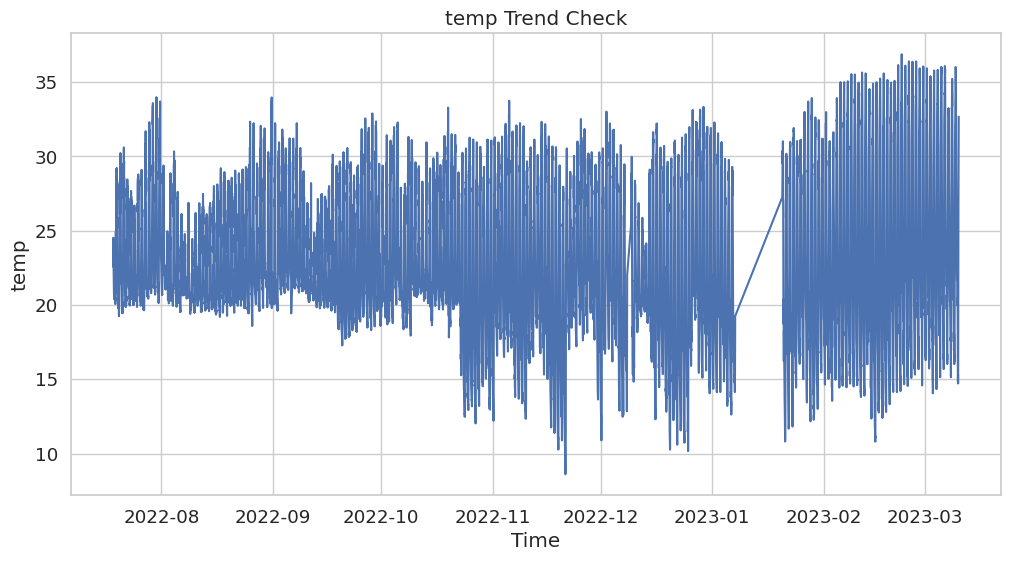

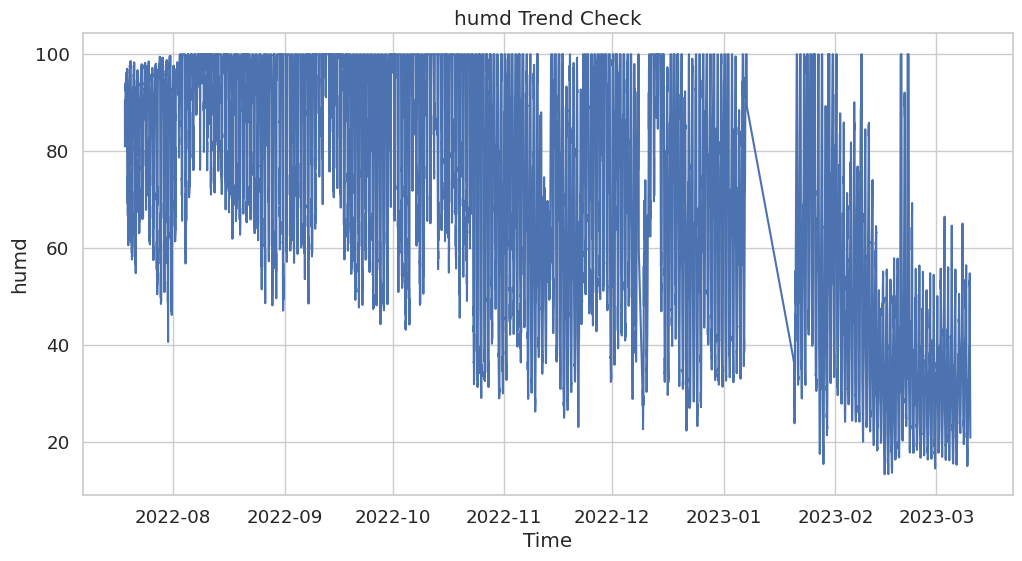

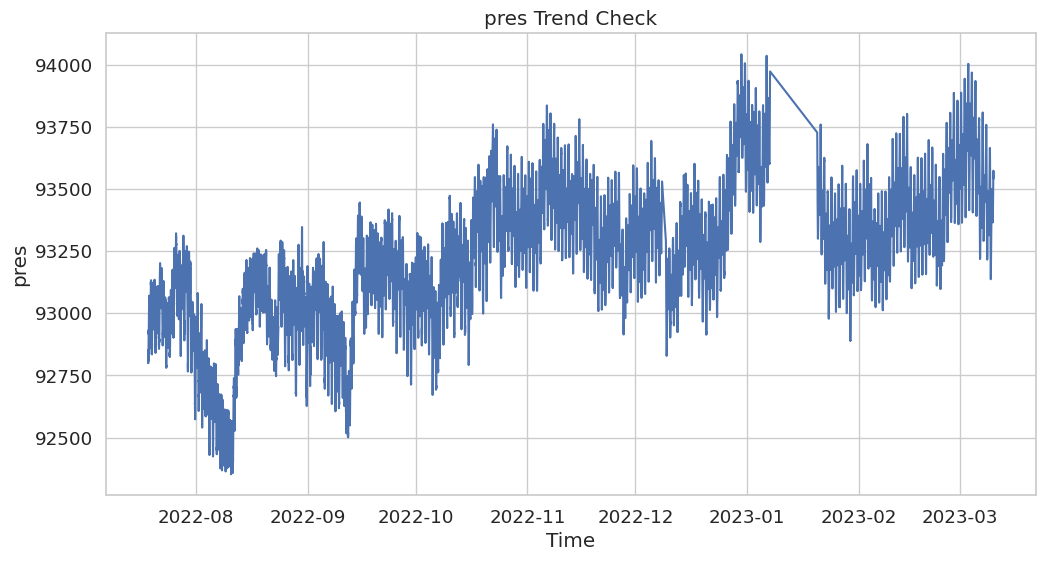

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the time series dataset into a pandas DataFrame
# df = pd.read_csv('your_dataset.csv', index_col='time_column', parse_dates=['time_column'])

# Plot the trend of each column with respect to time
sns.set(style='whitegrid', font_scale=1.2)
for column in data.columns:
    plt.figure(figsize=(12,6))
    plt.title(f'{column} Trend Check')
    sns.lineplot(data=data, x=data.index, y=column)
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.show()


### removing trend in the data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


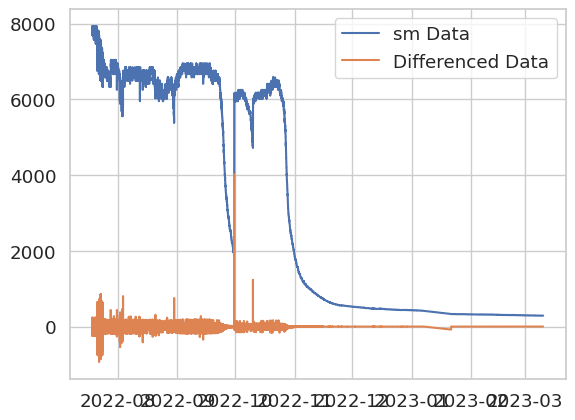

In [10]:
data.head()

,pm1,pm2,pm3,am,sm,st,lum
ttime,,,,,,,
2022-07-18 15:42:55,3.63,0.0,0.0,3.2,7813.0,25.65,15001.0
2022-07-18 15:47:55,4.19,0.0,0.0,4.8,7692.0,25.66,13863.0
2022-07-18 15:52:55,4.74,0.0,0.0,4.0,7813.0,25.67,13788.0
2022-07-18 15:57:55,5.30,0.0,0.0,4.8,7813.0,25.68,14383.0
2022-07-18 16:02:55,0.55,5.3,5.3,3.2,7813.0,25.69,14621.0


<AxesSubplot:>

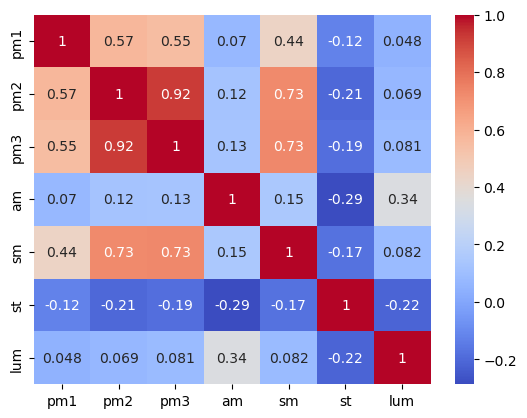

In [17]:
import seaborn as sns
import pandas as pd


# Create a correlation matrix between all variables
corr_matrix = data.corr()

# Create a heatmap for all variables
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm')


<AxesSubplot:>

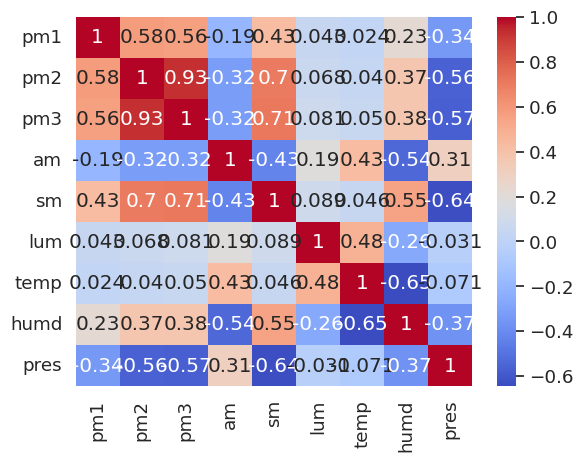

In [37]:
import seaborn as sns
import pandas as pd


# Create a correlation matrix between all variables
corr_matrix = data.corr()

# Create a heatmap for all variables
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm')

<AxesSubplot:>

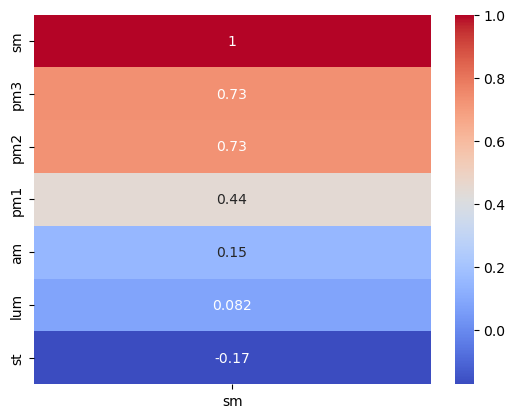

In [16]:
import seaborn as sns
import pandas as pd

# Create a correlation matrix between all variables
corr_matrix = data.corr()

# Select the target variable to create the heatmap against
target_variable = 'sm'

# Create a heatmap using the correlation matrix against the target variable
sns.heatmap(corr_matrix[[target_variable]].sort_values(by=target_variable, ascending=False),
            annot=True,
            cmap='coolwarm')


<AxesSubplot:>

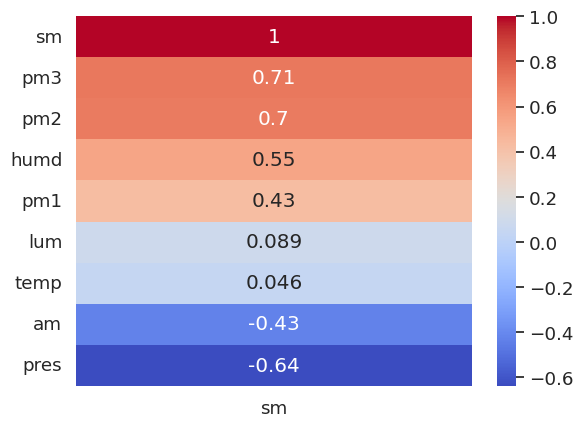

In [38]:
import seaborn as sns
import pandas as pd

# Create a correlation matrix between all variables
corr_matrix = data.corr()

# Select the target variable to create the heatmap against
target_variable = 'sm'

# Create a heatmap using the correlation matrix against the target variable
sns.heatmap(corr_matrix[[target_variable]].sort_values(by=target_variable, ascending=False),
            annot=True,
            cmap='coolwarm')


### understanding missing values

(19341, 7)


<AxesSubplot:>

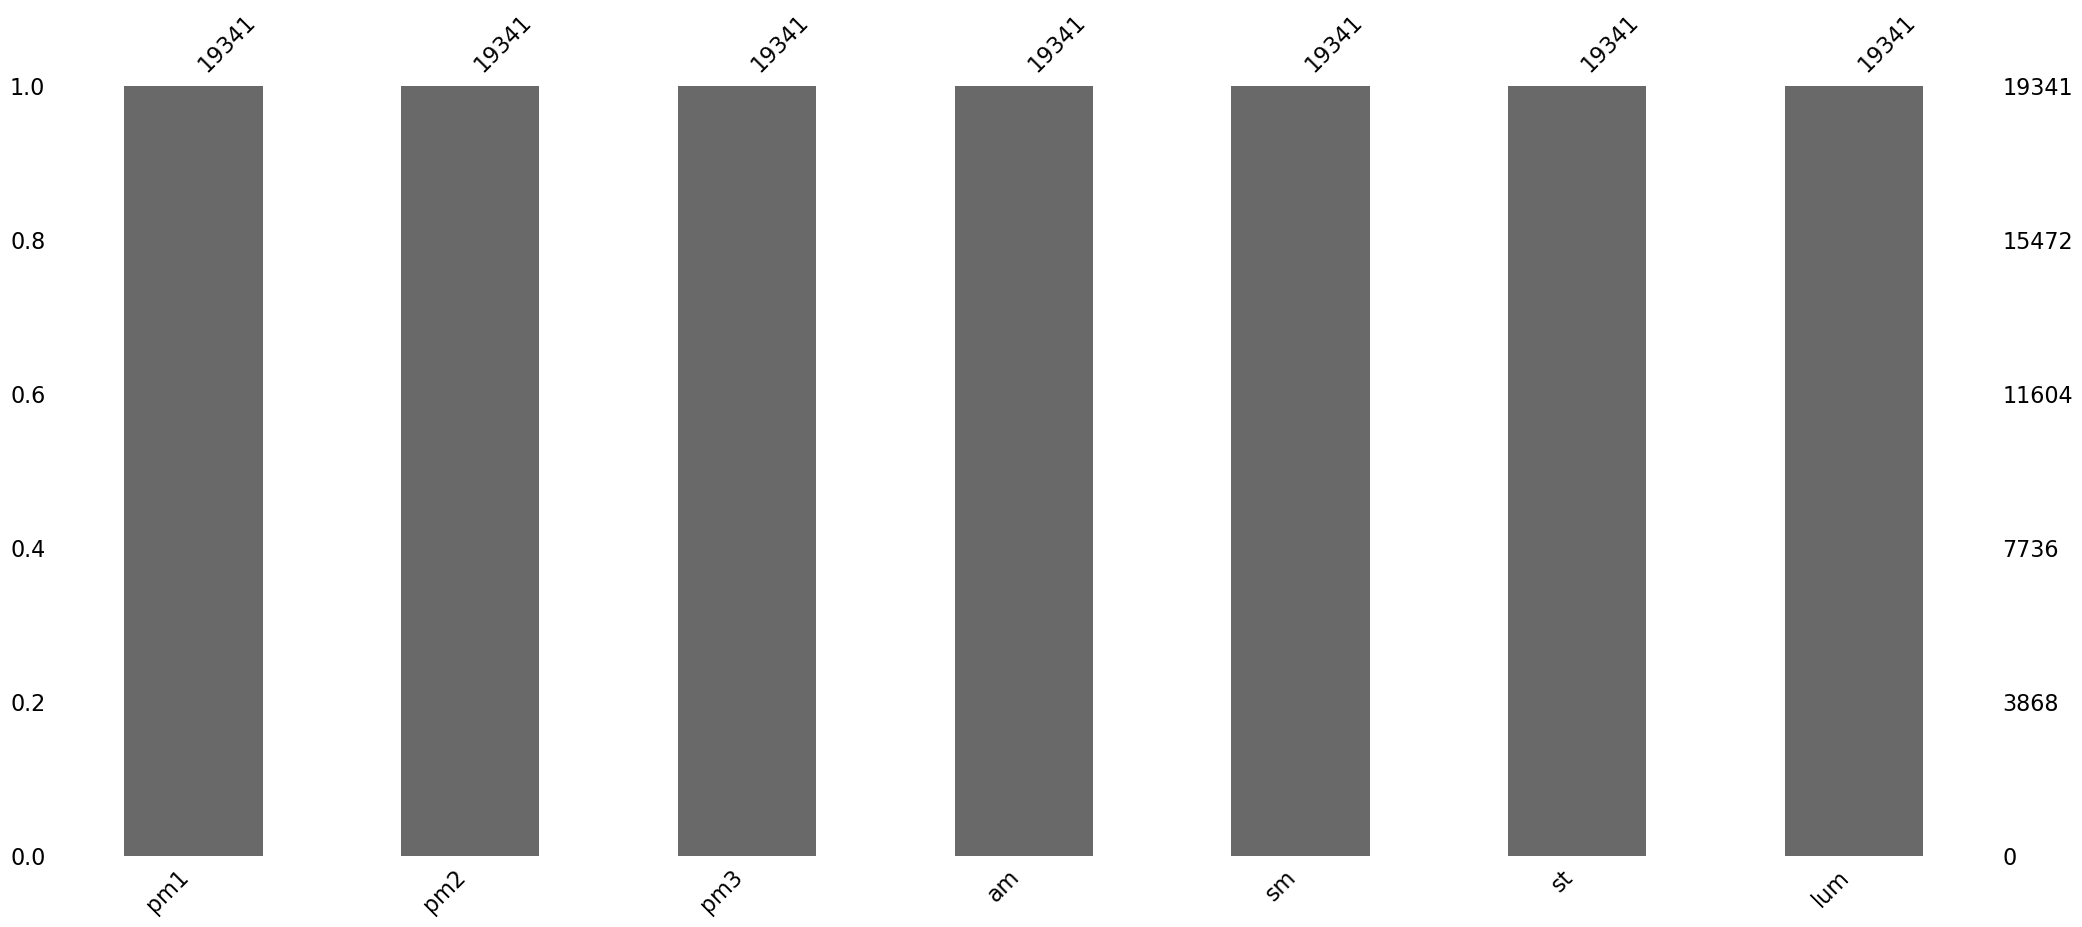

In [21]:
import missingno as msno
import pandas as pd


# Create a matrix plot to visualize null values
# msno.matrix(data)
print(data.shape)
msno.bar(df)

(20166, 9)


<AxesSubplot:>

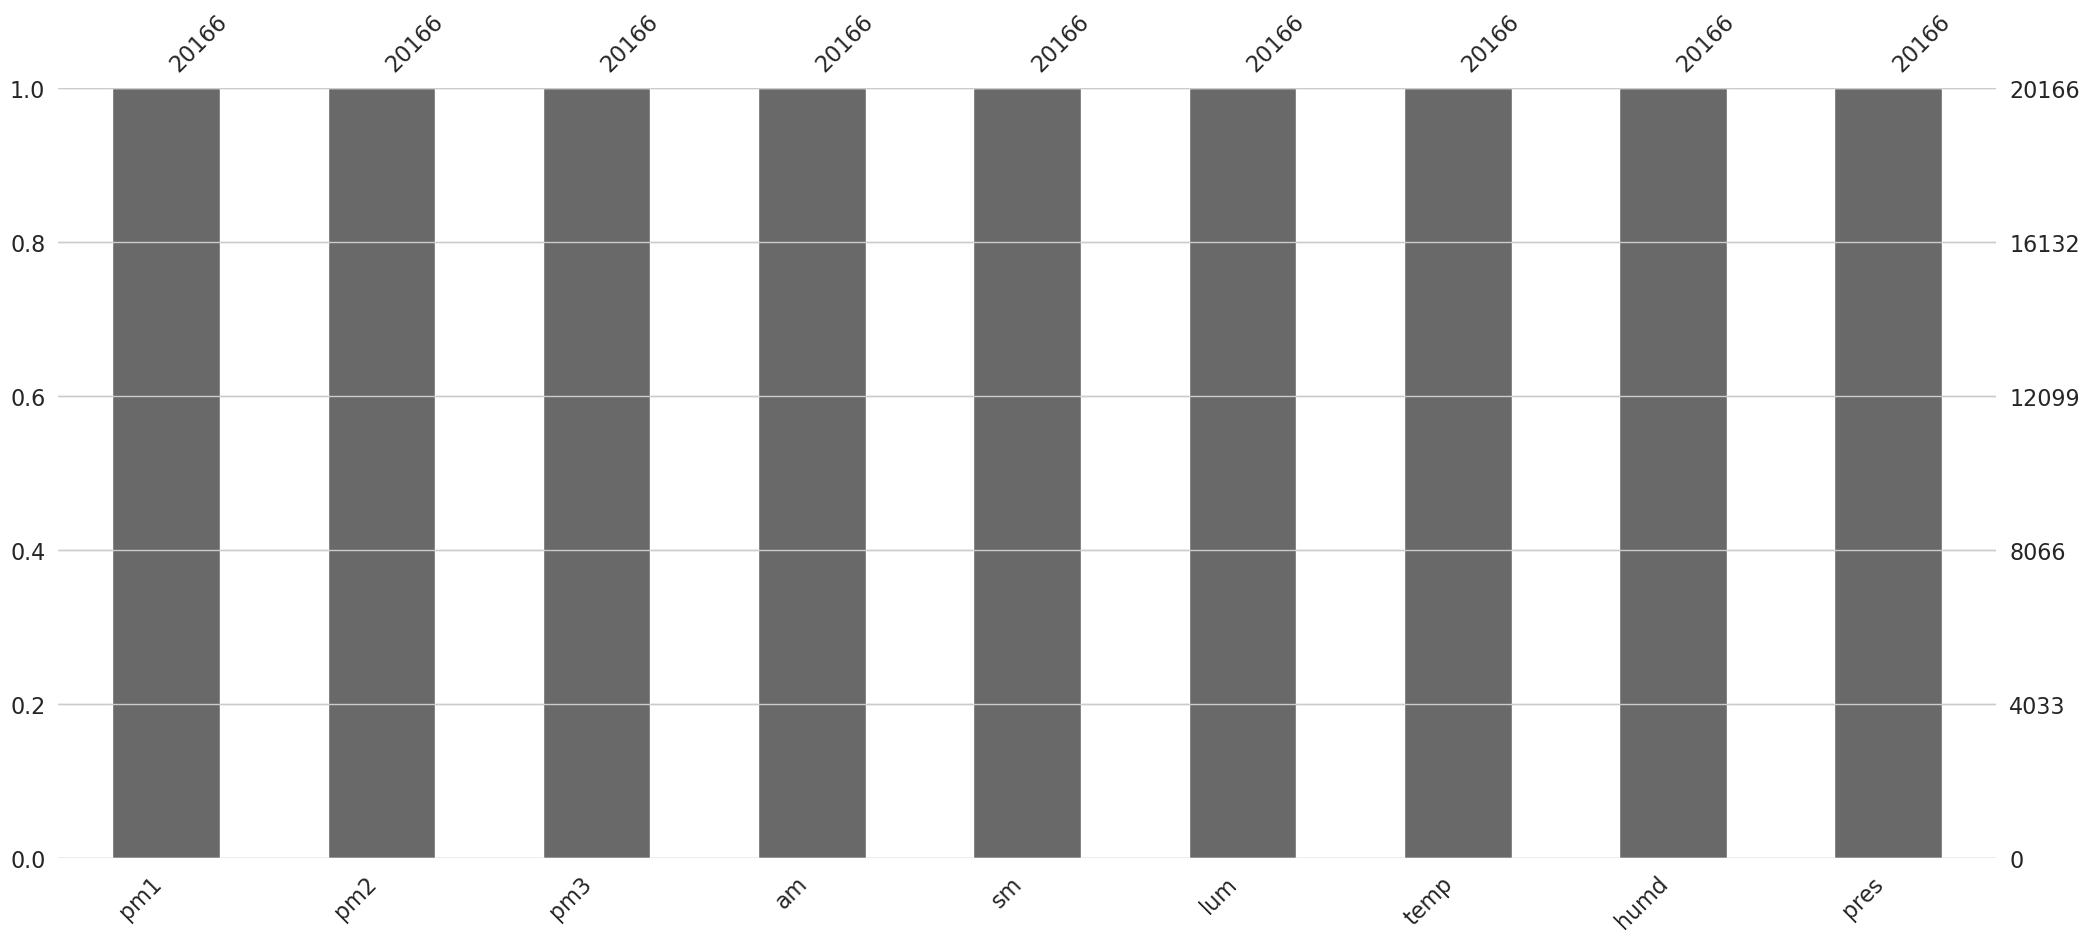

In [39]:
import missingno as msno
import pandas as pd


# Create a matrix plot to visualize null values
# msno.matrix(data)
print(data.shape)
msno.bar(data)

### visualising the outliers

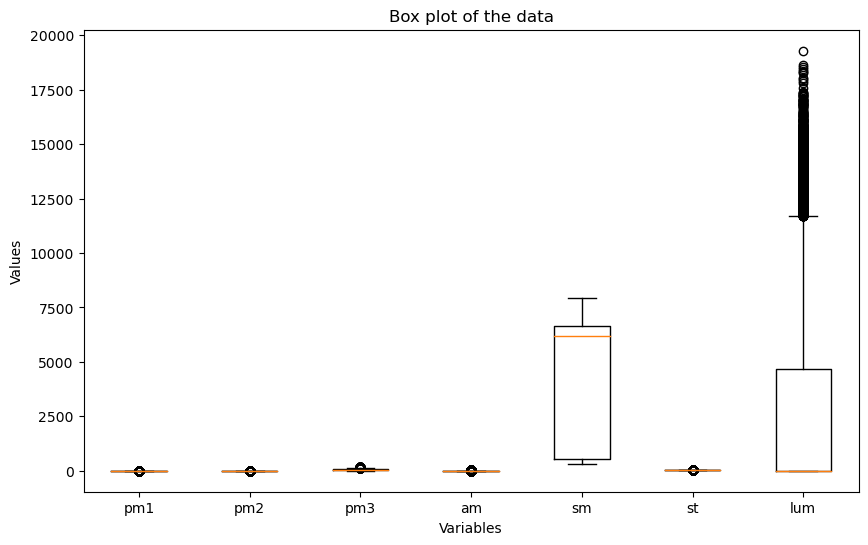

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a box plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data.values, labels=data.columns)
ax.set_title('Box plot of the data')
ax.set_xlabel('Variables')
ax.set_ylabel('Values')

# Show outliers
outliers = []
for i, col in enumerate(data.columns):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    threshold = 3 * iqr
    outliers_i = data[(data[col] < q1 - threshold) | (data[col] > q3 + threshold)].index.tolist()
    outliers += outliers_i
outliers = list(set(outliers))
# if outliers:
#     print(f"The following indices are outliers: {outliers}")
#     ax.plot([i+1 for i in range(len(data.columns))], data.iloc[outliers].values, 'rx', markersize=10)

plt.show()



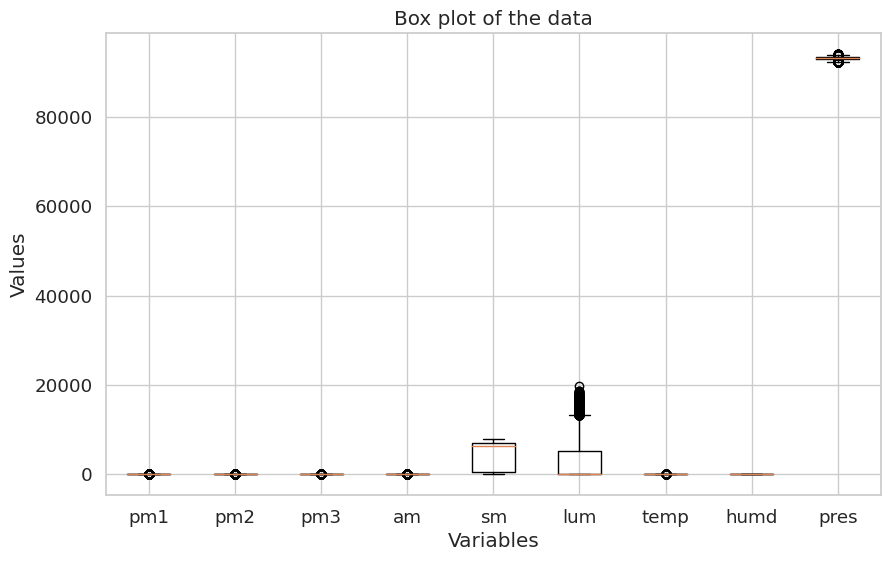

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a box plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data.values, labels=data.columns)
ax.set_title('Box plot of the data')
ax.set_xlabel('Variables')
ax.set_ylabel('Values')

# Show outliers
outliers = []
for i, col in enumerate(data.columns):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    threshold = 3 * iqr
    outliers_i = data[(data[col] < q1 - threshold) | (data[col] > q3 + threshold)].index.tolist()
    outliers += outliers_i
outliers = list(set(outliers))
# if outliers:
#     print(f"The following indices are outliers: {outliers}")
#     ax.plot([i+1 for i in range(len(data.columns))], data.iloc[outliers].values, 'rx', markersize=10)

plt.show()




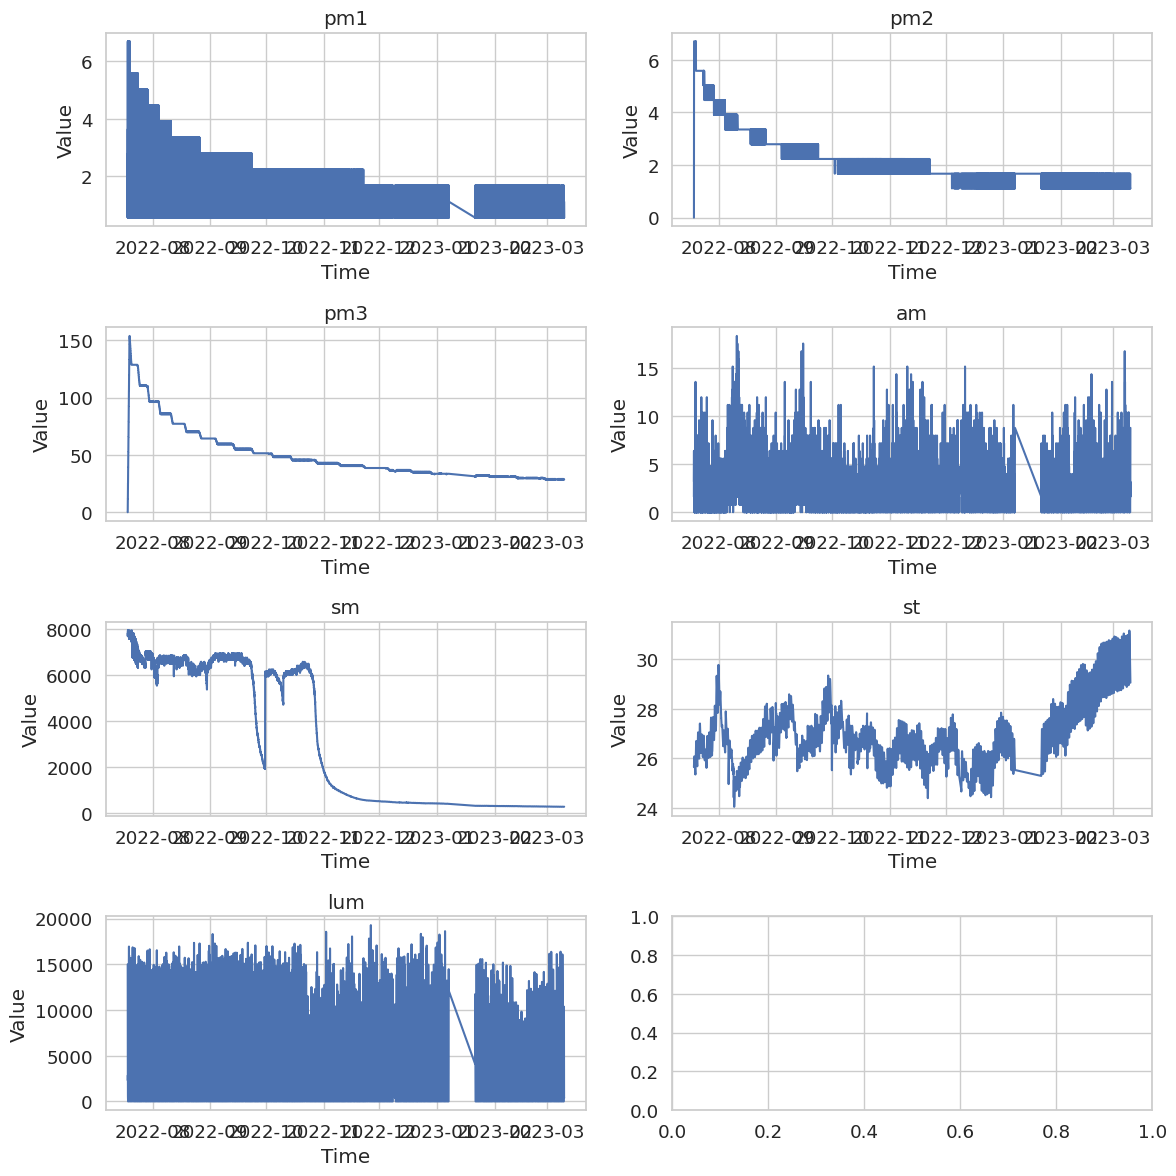

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

data=df
# Create line plots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))
for i, col in enumerate(data.columns):
    ax = axs[i//2, i%2]
    ax.plot(data.index, data[col])
    ax.set_title(col)
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()


IndexError: index 4 is out of bounds for axis 0 with size 4

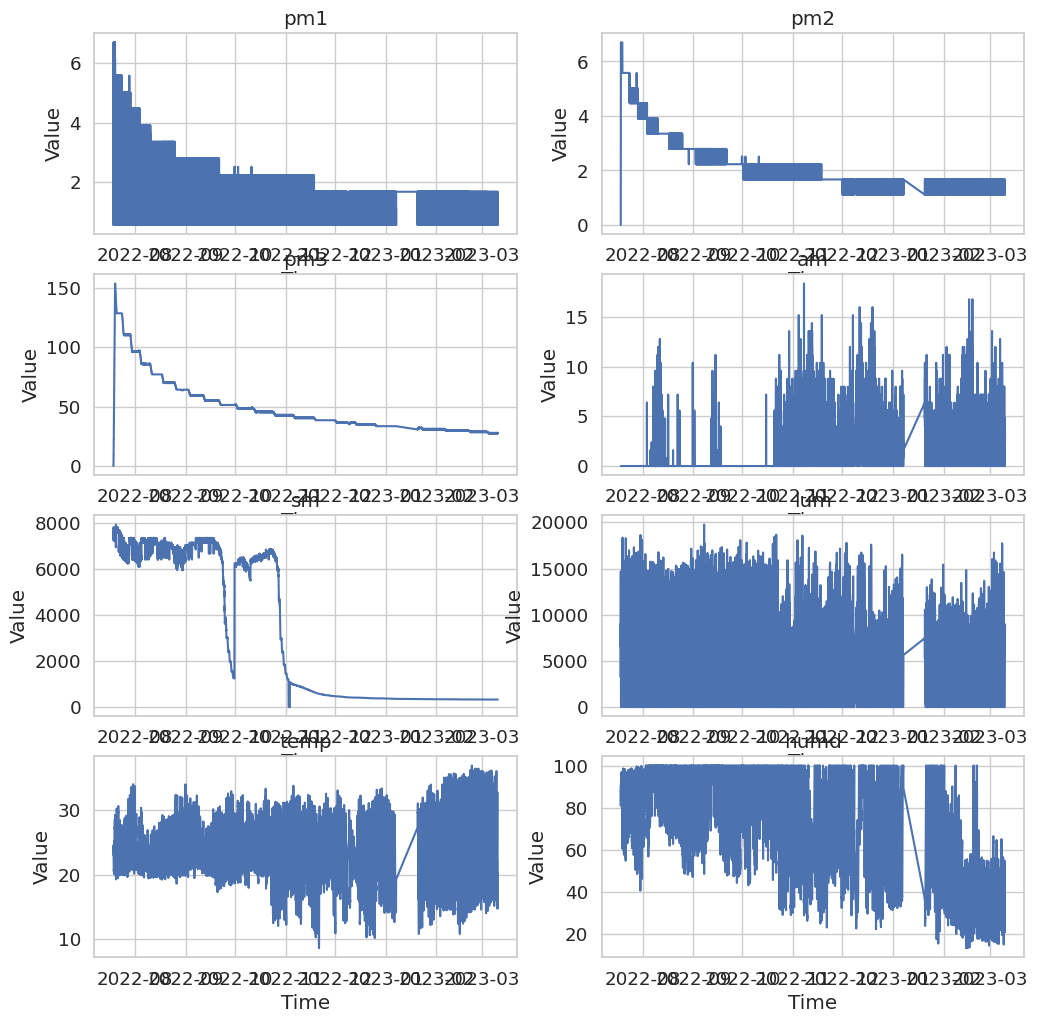

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

data=df2
# Create line plots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))
for i, col in enumerate(data.columns):
    ax = axs[i//2, i%2]
    ax.plot(data.index, data[col])
    ax.set_title(col)
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()


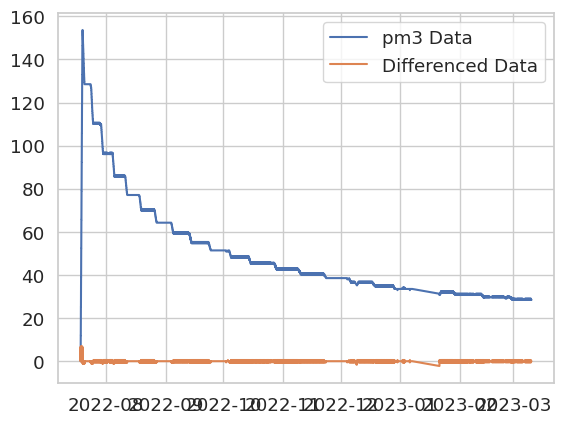

In [44]:
import pandas as pd

data=df
# Create a new column that contains the differenced values
data['differenced_values'] = data['pm3'].diff()

# Remove the first row (which contains a NaN value due to differencing)
data = data.dropna()

# Plot the original and differenced data for comparison
import matplotlib.pyplot as plt
plt.plot(data.index, data['pm3'], label='pm3 Data')
plt.plot(data.index, data['differenced_values'], label='Differenced Data')
plt.legend()
plt.show()


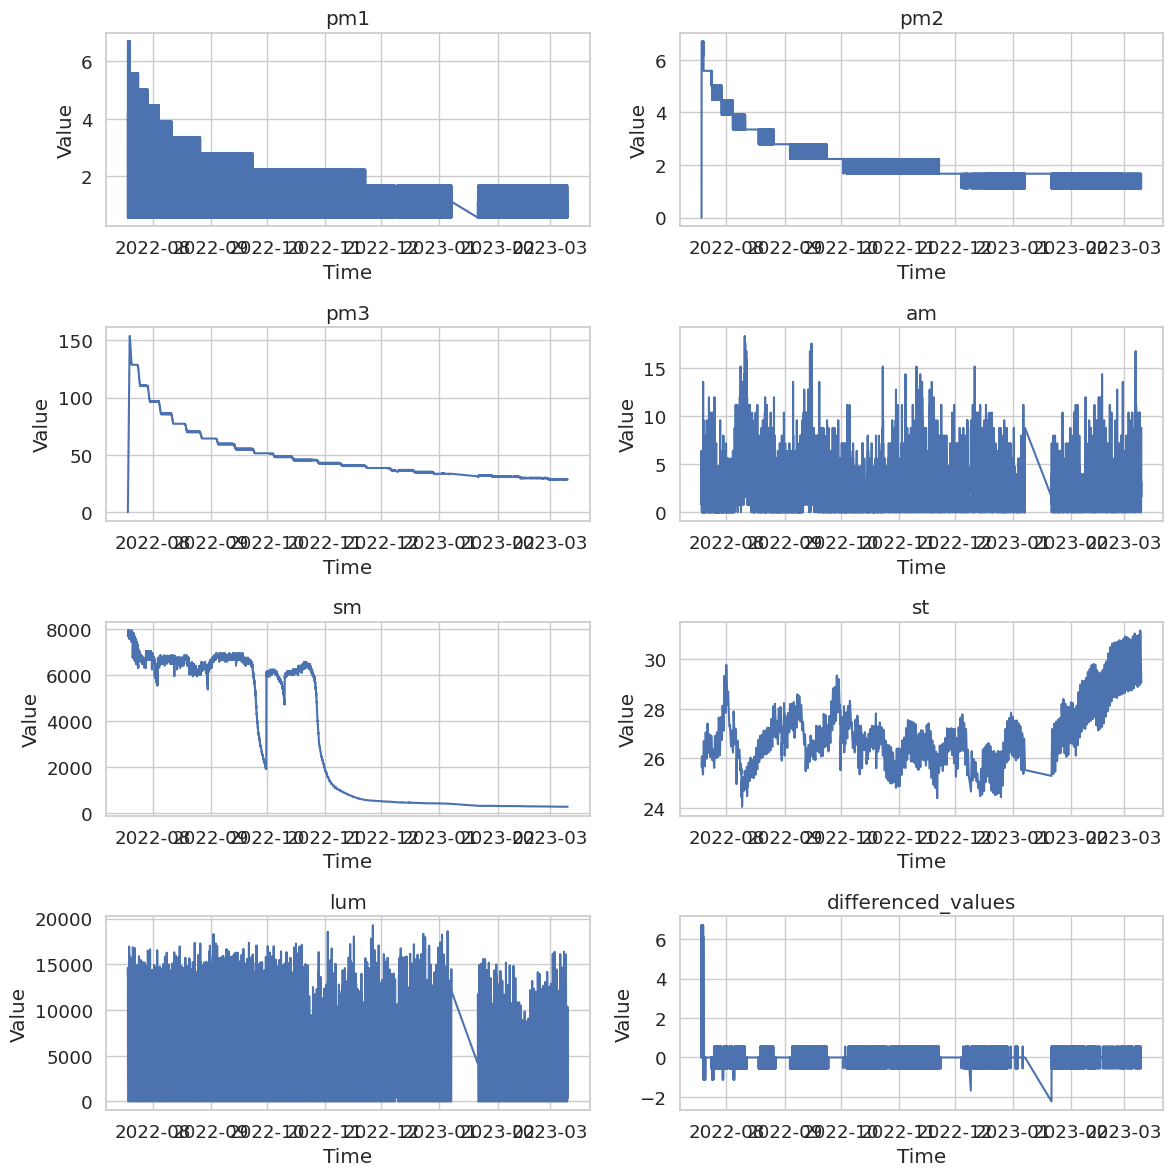

In [45]:
import pandas as pd
import matplotlib.pyplot as plt


# Create line plots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))
for i, col in enumerate(data.columns):
    ax = axs[i//2, i%2]
    ax.plot(data.index, data[col])
    ax.set_title(col)
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()


<AxesSubplot:>

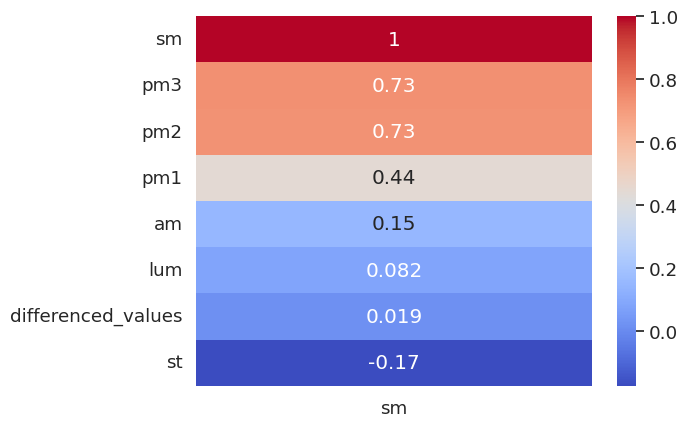

In [46]:
import seaborn as sns
import pandas as pd

# Create a correlation matrix between all variables
corr_matrix = data.corr()

# Select the target variable to create the heatmap against
target_variable = 'sm'

# Create a heatmap using the correlation matrix against the target variable
sns.heatmap(corr_matrix[[target_variable]].sort_values(by=target_variable, ascending=False),
            annot=True,
            cmap='coolwarm')


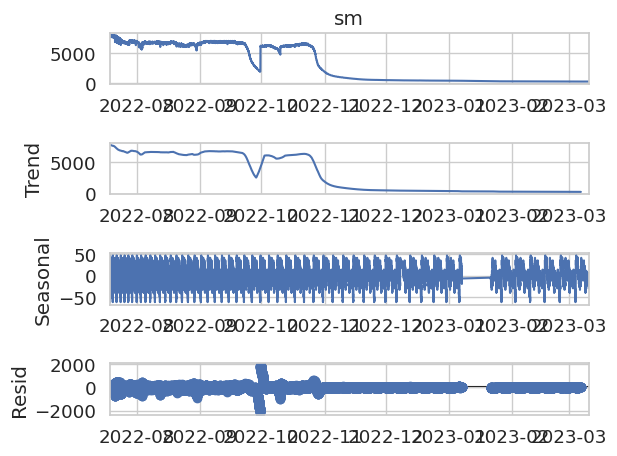

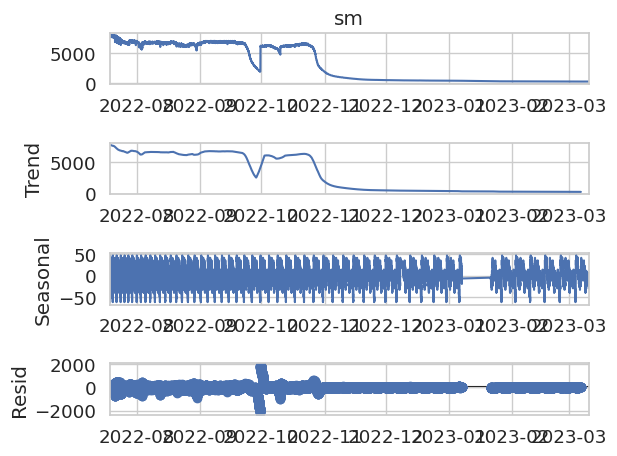

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
df3=df
res = seasonal_decompose(df3["sm"], model='additive', filt=None, period=365, two_sided=True, extrapolate_trend=0)
res.plot()

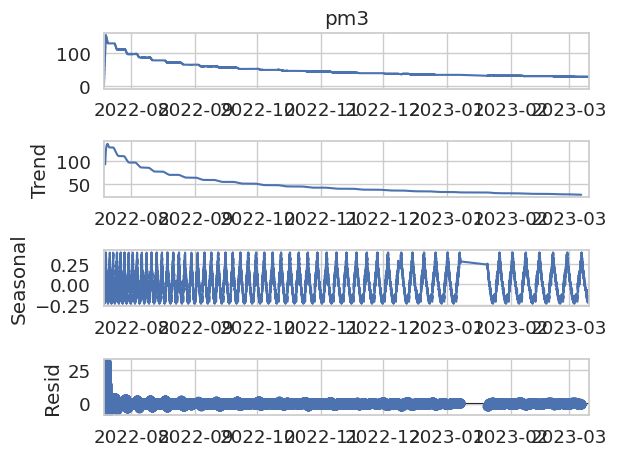

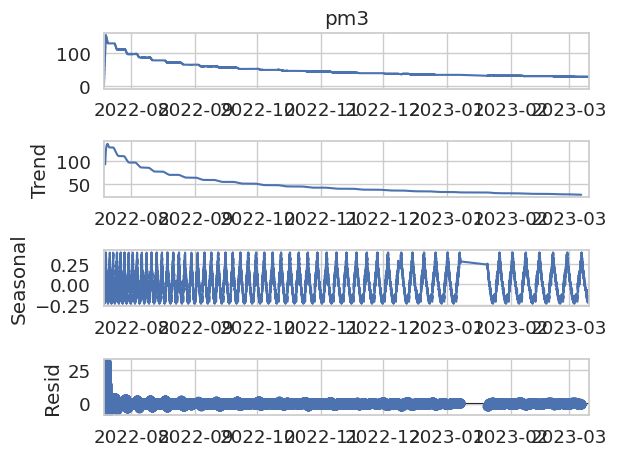

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
df3=df2
res = seasonal_decompose(df3["pm3"], model='additive', filt=None, period=365, two_sided=True, extrapolate_trend=0)
res.plot()